In [31]:
# 데이터 구성: Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 평가 함수
from statsmodels.tools.eval_measures import rmse
# jupyter notebook 사용시 그래프 자동 출력 옵션
%matplotlib inline

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro

### step 1 데이터 구성하기

In [2]:
# 파일명, 변수, 값 등에 한글 포함시 engine = "python"으로 지정
df_raw = pd.read_csv("C:/Users/jk000/Desktop/3. Big Data 분석_실습화일/체질검사.csv", encoding='euc-kr')

# df_raw = pd.read_csv("/home/pirl/test/BigData/체질검사.csv", encoding='euc-kr')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


### BMI 파생 변수 만들기

In [3]:
df_raw["BMI"] = df_raw["WEIGHT"]*0.45 / ( df_raw["HEIGHT"] * 2.54 * 0.01)**2

In [4]:
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165


### step 2 변수 간의 경향성 파악 - 그래프 분석

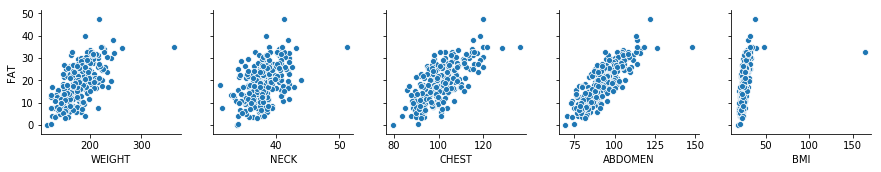

In [5]:
# 산점도 행렬: 목표변수와 설명변수 지정, kind = "scatter"|"reg"
sns.pairplot(df_raw, y_vars="FAT", x_vars=["WEIGHT", "NECK", "CHEST", "ABDOMEN", "BMI"])

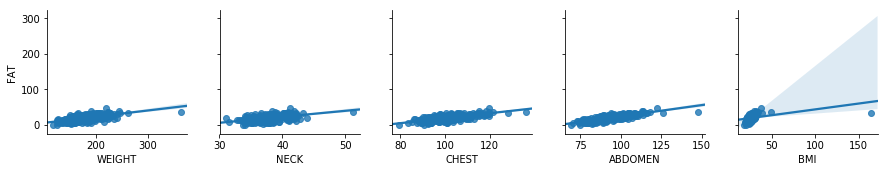

In [6]:
# 회귀 적합선 추가: kind = "reg"
sns.pairplot(df_raw, y_vars="FAT", x_vars=["WEIGHT", "NECK", "CHEST", "ABDOMEN", "BMI"], kind="reg")

### step 2 변수 간의 경향성 파악 

### 그래프 분석

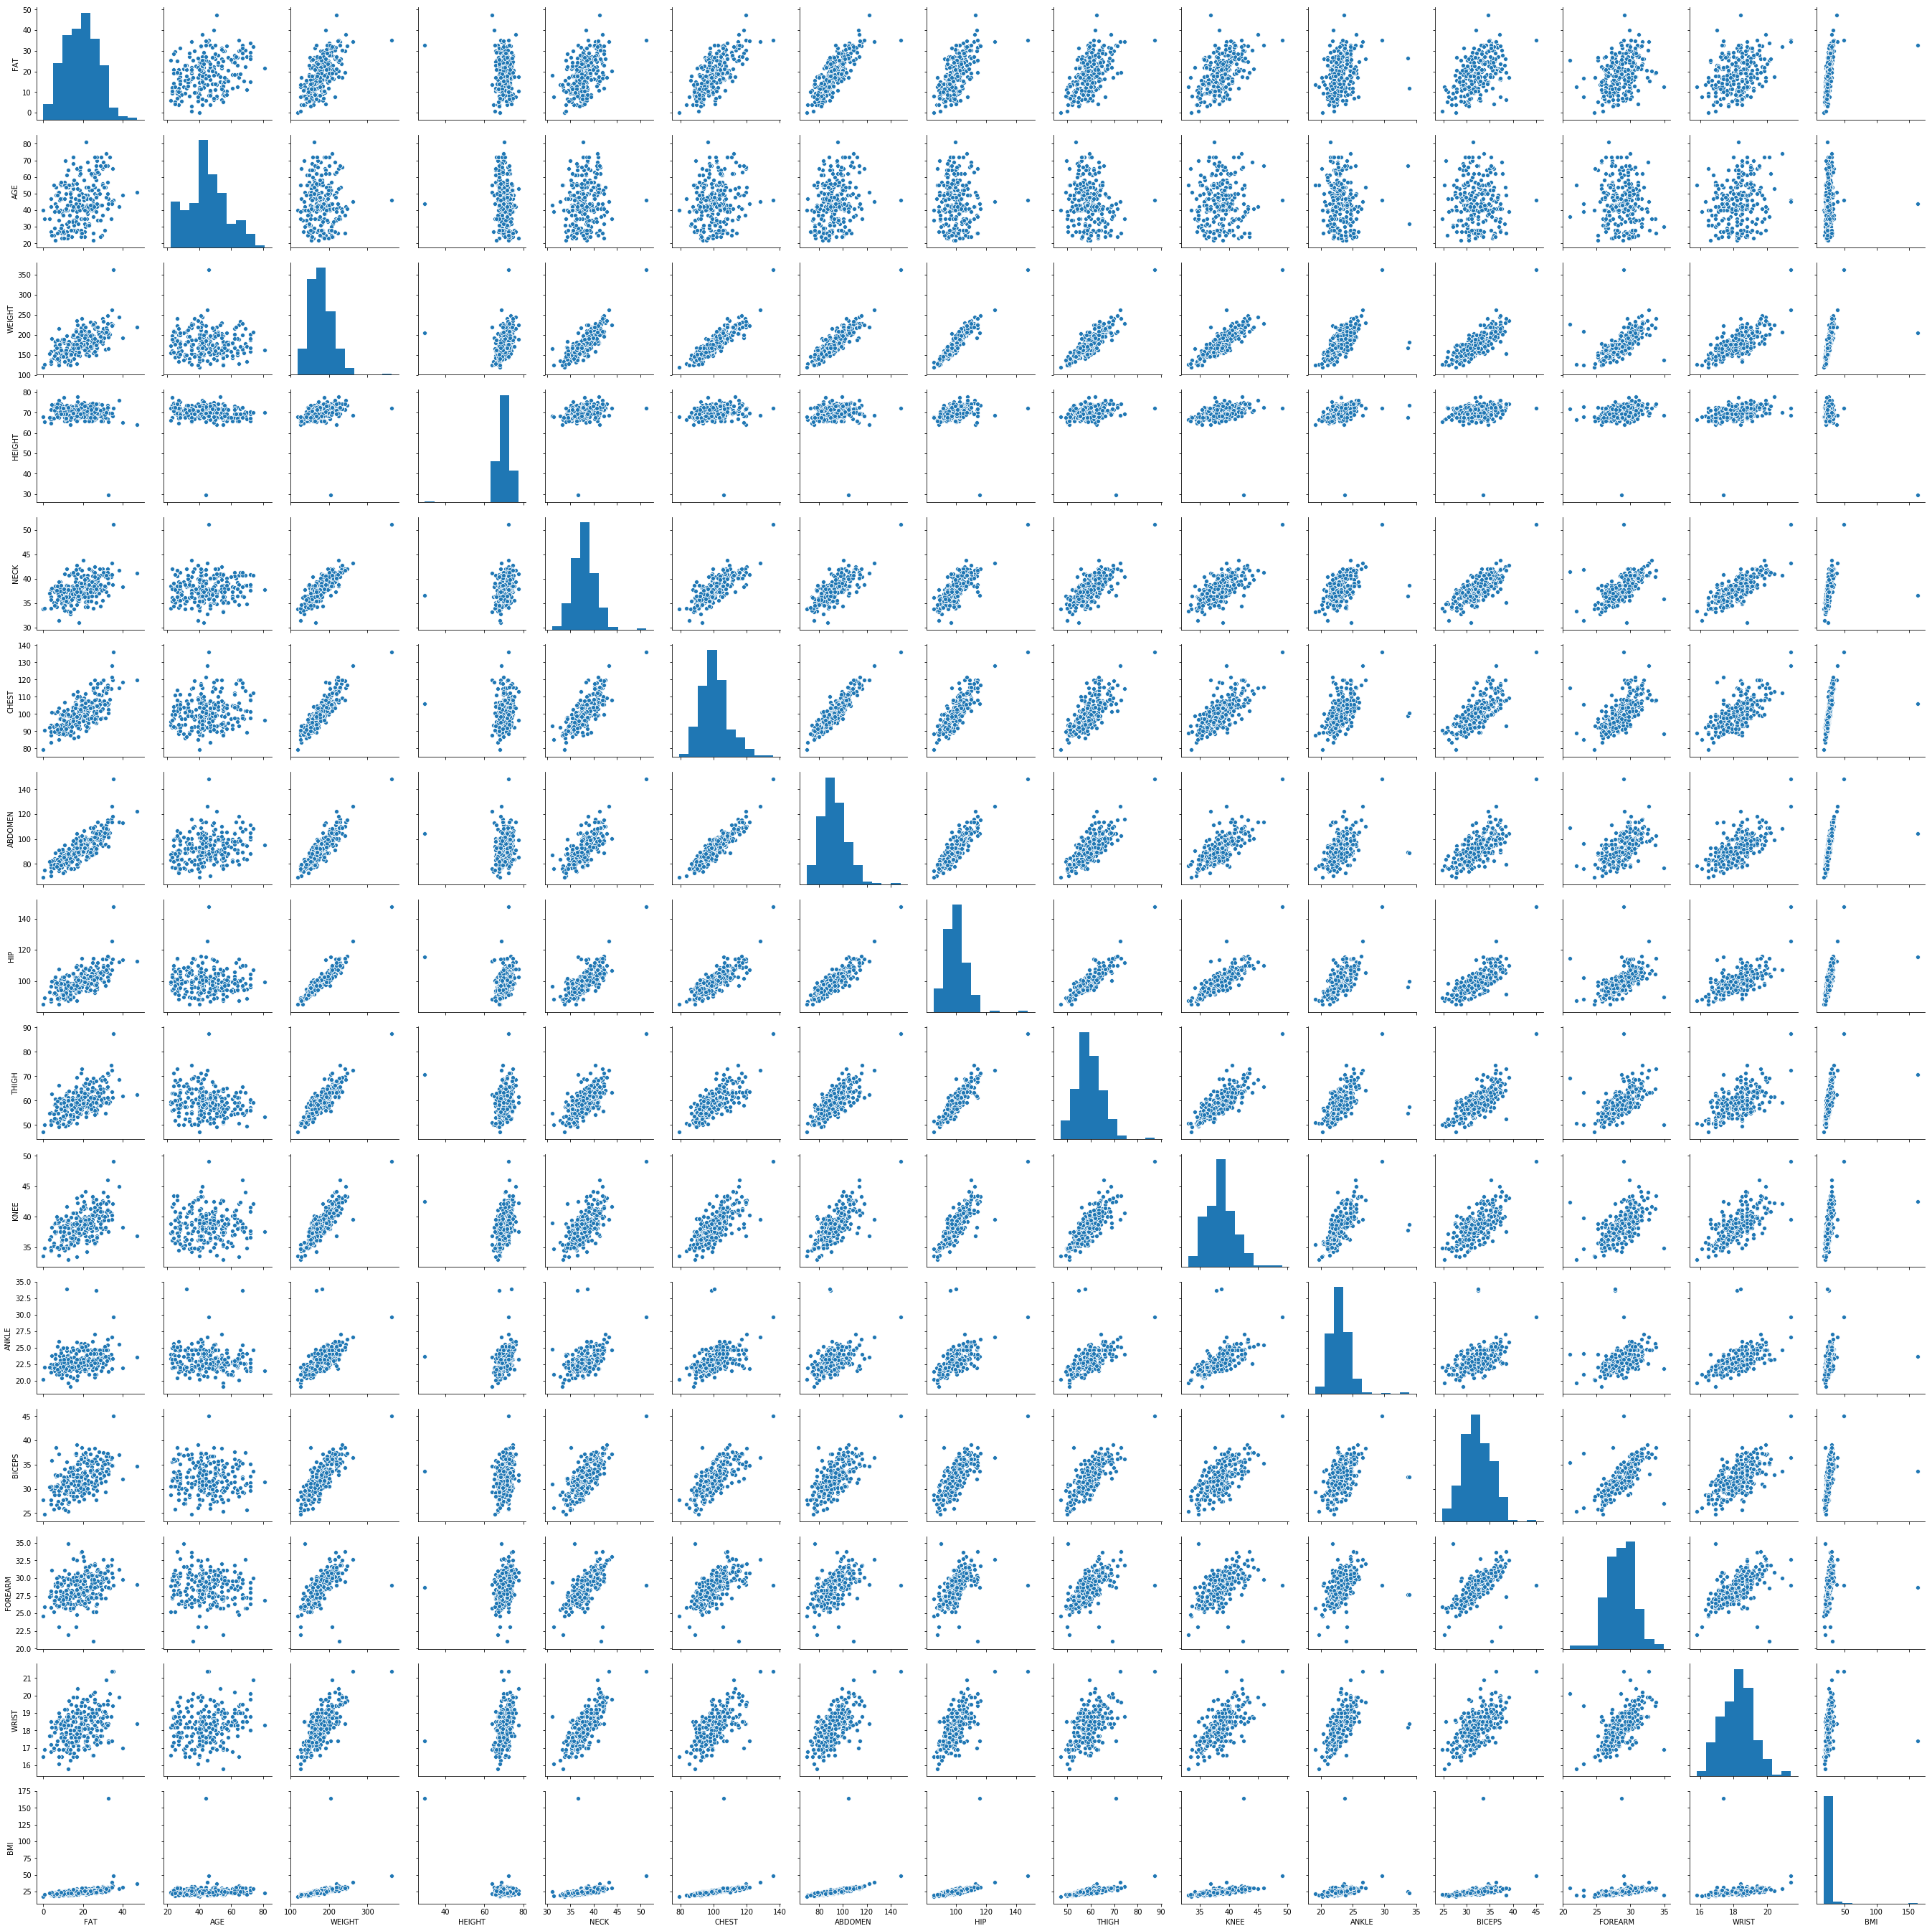

In [7]:
# 산점도 행렬:전체 숫자형 변수
sns.pairplot(df_raw)

### 상관관계 분석

In [8]:
# 상관관계 분석
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,0.371
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,0.040
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730,0.391
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,-0.638
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.266
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,0.383
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,0.415
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,0.462
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,0.433
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,0.364


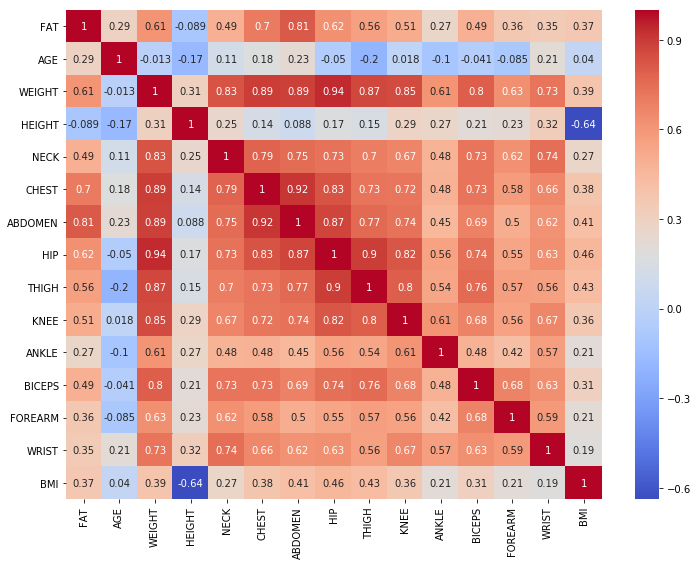

In [9]:
plt.figure(figsize = (12,9))
sns.heatmap(df_raw.corr(method = "pearson").round(3), annot = True, cmap = 'coolwarm')
plt.show()

### step 3 회귀 모델 생성

In [10]:
# 선형 회귀 분석: formula(y ~ X1 + X2 + ...) 이용. 상수항(intercept) 자동 추가. 코드 중간에 줄 바꿈 "\" 추가
reg_model = smf.ols(formula= "FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
                            KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI ", data = df_raw)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     50.56
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           5.49e-63
Time:                        23:26:18   Log-Likelihood:                -718.19
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     237   BIC:                             1519.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.2460     24.500     -0.990      0.3

### 설명변수 간의 다중공선성 확인

In [11]:
# 설명변수 간의 다중공선성 확인: 설명변수 데이터 생성 및 상수항 추가
df_raw_x = df_raw.drop("FAT", axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

C:\Users\jk000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
10,ANKLE,1.922
12,FOREARM,2.196
1,AGE,2.251
13,WRIST,3.378
11,BICEPS,3.674
4,NECK,4.456
9,KNEE,4.815
14,BMI,7.432
8,THIGH,8.010
3,HEIGHT,9.146


# WEIGHT 변수 제거

In [12]:
# 선형 회귀 분석: formula(y ~ X1 + X2 + ...) 이용. 상수항(intercept) 자동 추가. 코드 중간에 줄 바꿈 "\" 추가
reg_model = smf.ols(formula= "FAT ~ AGE  + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
                            KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI ", data = df_raw)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     53.97
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           2.29e-63
Time:                        23:26:18   Log-Likelihood:                -719.42
No. Observations:                 252   AIC:                             1467.
Df Residuals:                     238   BIC:                             1516.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6651      8.839      1.207      0.2

In [13]:
# 설명변수 간의 다중공선성 확인: 설명변수 데이터 생성 및 상수항 추가
df_raw_x = df_raw.drop(["FAT", "WEIGHT"], axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

C:\Users\jk000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
9,ANKLE,1.847
11,FOREARM,2.196
1,AGE,2.196
12,WRIST,3.327
10,BICEPS,3.507
3,NECK,3.962
2,HEIGHT,4.665
13,BMI,4.729
8,KNEE,4.788
7,THIGH,7.837


# Hip 변수 제거

In [14]:
# 선형 회귀 분석: formula(y ~ X1 + X2 + ...) 이용. 상수항(intercept) 자동 추가. 코드 중간에 줄 바꿈 "\" 추가
reg_model = smf.ols(formula= "FAT ~ AGE  + HEIGHT + NECK + CHEST + ABDOMEN + THIGH + \
                            KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI ", data = df_raw)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     56.85
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           4.92e-63
Time:                        23:26:18   Log-Likelihood:                -722.44
No. Observations:                 252   AIC:                             1471.
Df Residuals:                     239   BIC:                             1517.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1864      8.866      0.923      0.3

In [15]:
# 설명변수 간의 다중공선성 확인: 설명변수 데이터 생성 및 상수항 추가
df_raw_x = df_raw.drop(["FAT", "WEIGHT", "HIP"], axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

C:\Users\jk000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
8,ANKLE,1.844
1,AGE,2.125
10,FOREARM,2.168
11,WRIST,3.300
9,BICEPS,3.506
3,NECK,3.958
12,BMI,4.309
2,HEIGHT,4.380
7,KNEE,4.732
6,THIGH,6.380


# 후진 제거법 사용

In [16]:
# RFE(recursive feature elimination)함수: 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
# 목표 변수 분리
df_raw_y = df_raw["FAT"]
# sklearn의 선형회귀 모델
model = LinearRegression()
# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator= model, n_features_to_select= 5).fit(df_raw_x, df_raw_y)
# 선택된 변수
selected_cols = df_raw_x.columns[rfe.support_] # rfe.support_는 True / False로 구성
# 제거된 편수
removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables: {}".format(selected_cols))
print("Removed Variables: {}".format(removed_cols))


Selected Variables: Index(['HEIGHT', 'NECK', 'ABDOMEN', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables: Index(['AGE', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS', 'BMI'], dtype='object')


In [17]:
# 회귀 모델 생성
rfe_reg_model = smf.ols(formula = "FAT ~ HEIGHT + NECK + ABDOMEN + FOREARM + WRIST", data = df_raw)
# 적합
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     127.8
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           2.54e-66
Time:                        23:26:18   Log-Likelihood:                -731.10
No. Observations:                 252   AIC:                             1474.
Df Residuals:                     246   BIC:                             1495.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9078      6.835      0.425      0.6

In [18]:
# 후진제거법에 의하여 선택된 데이터
df_raw_x_rfe = df_raw_x[selected_cols]
df_raw_x_rfe_const = add_constant(df_raw_x_rfe)
# 다중공선성 저장
df_rfe_vif = pd.DataFrame()
df_rfe_vif["variable"] = df_raw_x_rfe_const.columns
df_rfe_vif["VIF"] = [variance_inflation_factor(df_raw_x_rfe_const.values, i) for i in range(df_raw_x_rfe_const.shape[1])]
df_rfe_vif.sort_values("VIF", inplace = True)
df_rfe_vif.round(3)

C:\Users\jk000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,HEIGHT,1.165
4,FOREARM,1.737
3,ABDOMEN,2.459
5,WRIST,2.527
2,NECK,3.576
0,const,592.868


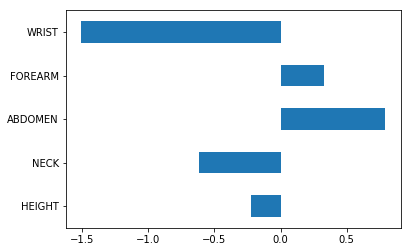

In [19]:
# 설명변수 중요도(표준화 적용 이전) -> 표준화 회귀계수 산출해야 함
df_reg_coef = pd.DataFrame({"Coef": rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

In [20]:
# 설명변수 표준화 적용 -> 표준화 회귀계수 산출 목적
scaler = StandardScaler()
# Scale 변환대상 변수 : 일반적으로 설명변수
cols = df_raw_x.columns
# Scale 변환
np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)
# 목표변수 추가
df_scaled["FAT"] = df_raw["FAT"]
reg_model_scaled = smf.ols(formula = "FAT ~ HEIGHT  + FOREARM  +  ABDOMEN  + WRIST + NECK", data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     127.8
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           2.54e-66
Time:                        23:26:19   Log-Likelihood:                -731.10
No. Observations:                 252   AIC:                             1474.
Df Residuals:                     246   BIC:                             1495.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.281     68.221      0.0

C:\Users\jk000\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jk000\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(0.9940625429153442, 0.42519885301589966)

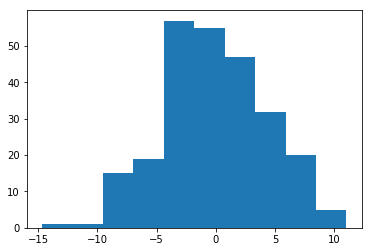

In [32]:
# 정규성 검정
plt.hist(reg_result_scaled.resid)
shapiro(reg_result_scaled.resid)

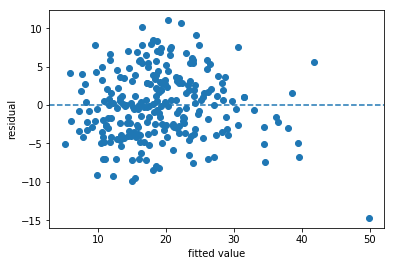

In [23]:
# 등분산성 검정
plt.scatter(reg_result_scaled.fittedvalues, reg_result_scaled.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle = "--")

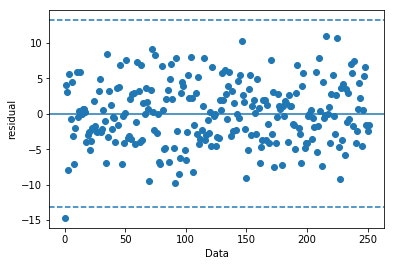

In [29]:
# 독립성 검정
plt.scatter(range(len(df_raw)), reg_result_scaled.resid, marker = "o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0, linestyle = "-")
plt.axhline(y=3*np.std(reg_result_scaled.resid), linestyle = "--")
plt.axhline(y=-3*np.std(reg_result_scaled.resid), linestyle = "--")

In [30]:
# 더빈왓슨 통계량
from statsmodels.stats.stattools import durbin_watson
durbin_watson(reg_result_scaled.resid)

2.07552785683797